# Uniform tree search

### Initialize tree

In [1]:
from utils import TreeNode, Tree
from copy import copy, deepcopy
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Example usage
depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5
tree = Tree(depth, branching_factor, n, discount_factor, make_viz=True, sampling="asymetric")

In [3]:
# attention: different meanings of depth for Tree and for TreeNode
print(tree.depth)
print(tree.root.depth)
print(tree.root.children[0].depth)

5
0
1


In [4]:
graph = tree.to_graphviz()
graph.render('tree', format='png', cleanup=True)

'tree.png'

In [5]:
reward = deepcopy(tree).uniform_search()

In [6]:
reward

0.7498636128673231

In [7]:
tree.compute_regret(reward)

0.12374586763111228

Regret histograms - uniformly sampled rewards

In [8]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor)
    reward = deepcopy(tree).uniform_search()
    regrets.append(tree.compute_regret(reward))

<AxesSubplot: ylabel='Count'>

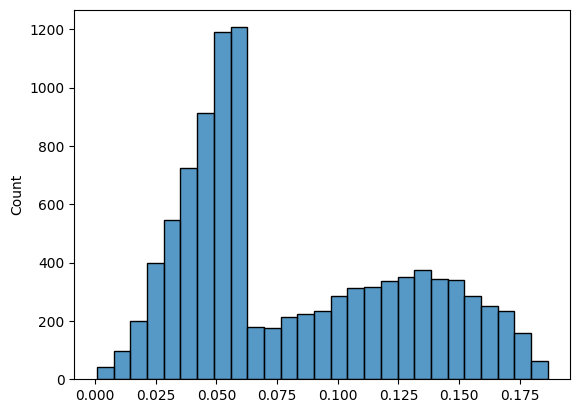

In [9]:
sns.histplot(regrets)

Regret histograms - comparing to asymetric rewards

In [10]:
n_samples = 10000

depth = 5
branching_factor = 2
discount_factor = 0.5
n = 5

regrets_asym = []
for i in range(n_samples):
    tree = Tree(depth, branching_factor, n, discount_factor, sampling="asymetric")
    reward = deepcopy(tree).uniform_search()
    regrets_asym.append(tree.compute_regret(reward))

In [11]:
len(regrets)

10000

In [12]:
len(regrets_asym)

10000

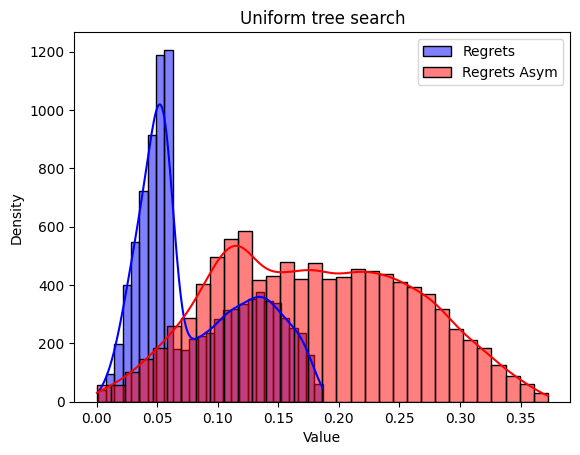

In [16]:
# Plotting histograms with density function
sns.histplot(regrets, color='blue', kde=True, label='Regrets')
sns.histplot(regrets_asym, color='red', kde=True, label='Regrets Asym')

# Adding labels and legend
plt.title("Uniform tree search")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


# Optimistic planning